In [22]:

import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def add_noise(img, noise_type="salt_and_pepper"):
    if noise_type == "salt_and_pepper":
        noisy_img = img.copy()
        row, col, ch = img.shape
        num_salt = np.ceil(0.02 * img.size * 0.5).astype(int)
        num_pepper = np.ceil(0.02 * img.size * 0.5).astype(int)

        # Salt noise
        coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
        noisy_img[coords[0], coords[1], :] = 255

        # Pepper noise
        coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
        noisy_img[coords[0], coords[1], :] = 0

        return noisy_img

    elif noise_type == "gaussian":
        mean = 0
        sigma = 25
        gaussian = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
        noisy_img = cv2.add(img, gaussian)
        return noisy_img

def apply_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

In [23]:

# Load the image
image_path = '.././images/word.jpg'  

original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Randomly add noise
noise_type = random.choice(["salt_and_pepper", "gaussian"])
noisy_image = add_noise(original_image, noise_type)

# Apply blur
blurred_image = apply_blur(noisy_image)


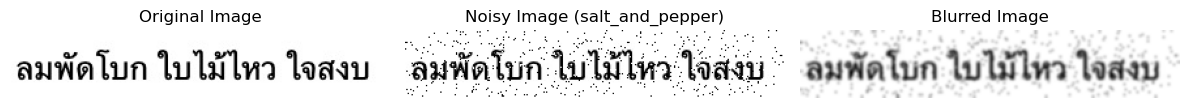

In [25]:

# Plot the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title(f"Noisy Image ({noise_type})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(blurred_image)
plt.title("Blurred Image")
plt.axis("off")

plt.tight_layout()
plt.show()




# การลบ Noise และ Blur จากภาพด้วย OpenCV

## **วัตถุประสงค์**
- เขียนโค้ดเพื่อปรับปรุงคุณภาพของภาพที่มี **noise** และถูก **blur** ให้ใกล้เคียงกับภาพต้นฉบับมากที่สุด

---

## **ขั้นตอนการทำงาน**
1. **โหลดภาพ**:
   - โหลดภาพต้นฉบับ (`original_image`), ภาพที่มี noise (`noisy_image`), และภาพที่ถูกเบลอ (`blurred_image`) จากโค้ดที่กำหนด
2. **ลด Noise**:
   - ใช้เทคนิคลด noise ต่าง ๆ 
3. **ลบ Blur**:
   - ใช้เทคนิคการ Sharpening Filters 
4. **วัดผลลัพธ์**:
     - เปรียบเทียบภาพที่ปรับปรุงแล้วกับภาพต้นฉบับ (`original_image`)

---

## **คำถาม**
1. Noise แบบใดที่แก้ไขได้ง่ายที่สุด และแบบใดที่แก้ไขได้ยากที่สุด?
2. เทคนิคการลบ noise หรือ blur แบบใดที่ให้ผลลัพธ์ดีที่สุด?

---

## **ข้อกำหนด**
1. โค้ดต้องมีการพล็อตภาพ 4 ภาพ:
   - **Original Image**
   - **Noisy Image**
   - **Blurred Image**
   - **Denoised and De-blurred Image**
2. แสดงค่า **PSNR** และ **SSIM** ระหว่างภาพต้นฉบับและภาพที่ปรับปรุงแล้ว

---
